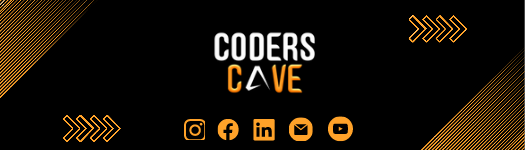

# IMDB Data Analysis

## Name: Mohammad Wasiq

## CodersCave Data Science Internship Project

In [1]:
# load the require libraries
import pandas as pd 
import numpy  as np

In [2]:
# load the dataset
df= pd.read_csv('imdb_top_1000.csv')

In [3]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
# columns of dataset
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
# calculate the missing values and arrange them in ascending order
df.isnull().sum().sort_values(ascending=False)

Gross            169
Meta_score       157
Certificate      101
Poster_Link        0
Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
dtype: int64

#  Feature Selection


**Dropping `"Poster_Link"` feature as it has no role.** 

In [7]:
df.drop('Poster_Link', axis=1, inplace= True)

In [8]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

**Dropping `"Certificate"` feature because it contains the metadata of movie which has no role in our data analysis task.**

In [9]:
df.drop('Certificate', axis=1, inplace=True)

In [10]:
df.columns

Index(['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

**Dropping `"Runtime"` feature because it has duration of a movie and this does not affects our analysis.**

In [11]:
df.drop('Runtime', axis=1, inplace=True)

In [12]:
df.columns

Index(['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'Overview',
       'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes', 'Gross'],
      dtype='object')

**Dropping `'Overview'` feature because overview of a movie has no relation with other features present in the dataset.**

In [13]:
df.drop('Overview', axis=1, inplace=True)

In [14]:
df.columns

Index(['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'Meta_score',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

**Dropping `"No_of_Votes"` feature because "No_of_Votes" feature is subset of "Rating" feature, so there is  no sense to keep both features together.**

In [15]:
df.columns

Index(['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'Meta_score',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

**Dropping `Star3` and `Star4` feature because they are not impacting  data set so much.**

In [16]:
df.drop(["Star3", "Star4"], axis=1, inplace=True)

In [17]:
df.columns

Index(['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'Meta_score',
       'Director', 'Star1', 'Star2', 'No_of_Votes', 'Gross'],
      dtype='object')

# Data Cleaning

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Genre          1000 non-null   object 
 3   IMDB_Rating    1000 non-null   float64
 4   Meta_score     843 non-null    float64
 5   Director       1000 non-null   object 
 6   Star1          1000 non-null   object 
 7   Star2          1000 non-null   object 
 8   No_of_Votes    1000 non-null   int64  
 9   Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.2+ KB


### Cleaning of  `"Released_Year"` column

In [19]:
df['Released_Year'].dtypes

dtype('O')

Since year should be of int type but it is of object type in our data so we will transform data type from object to int

In [20]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [21]:
df = df[df['Released_Year'] != 'PG']
df

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,"28,341,469"
1,The Godfather,1972,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,"134,966,411"
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,2303232,"534,858,444"
3,The Godfather: Part II,1974,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,"57,300,000"
4,12 Angry Men,1957,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,166544,NaN
996,Giant,1956,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,34075,NaN
997,From Here to Eternity,1953,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,43374,"30,500,000"
998,Lifeboat,1944,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,26471,NaN


In [22]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943'], dtype=object)

In [23]:
df['Released_Year'].astype(int)

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 999, dtype: int32

# Univariate Analysis

### Analyse on `"Gross"` feature

In [24]:
df['Gross'].head(10)

0     28,341,469
1    134,966,411
2    534,858,444
3     57,300,000
4      4,360,000
5    377,845,905
6    107,928,762
7     96,898,818
8    292,576,195
9     37,030,102
Name: Gross, dtype: object

**Since this feature shows the Gross income of the movie, and income should be a numeric value so we will convert this to numeric.**

In [25]:
df['Gross'] = df['Gross'].str.replace(',', '')

In [26]:
df['Gross']

0       28341469
1      134966411
2      534858444
3       57300000
4        4360000
         ...    
995          NaN
996          NaN
997     30500000
998          NaN
999          NaN
Name: Gross, Length: 999, dtype: object

In [27]:
# convert the column data type
df['Gross'] = df['Gross'].astype(float)

In [28]:
df['Gross'].isnull().sum()

169

**There are 169 missing values in this column**

In [29]:
df['Gross'].min()

1305.0

In [30]:
df['Gross'].max()

936662225.0

In [31]:
df['Gross'].mean()

67907277.16024096

In [32]:
df['Gross'].median()

23457439.5

### Treating null values
**Since there are 169 null values are present,and it is much of total values that is 999 so we will not drop these nullvalues but we will treat them. In order to treat null values we will try to fill these values. For filling these null values we have to check that if there are outliers present in this feature then we will fill these null values by `Median()` else `mean()` of this feature itelf.**

<AxesSubplot:>

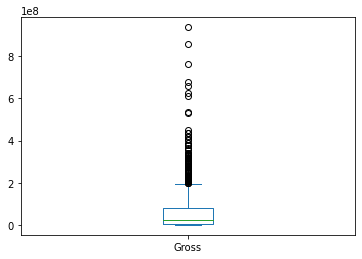

In [33]:
df['Gross'].plot(kind='box')

In [34]:
q1= df['Gross'].quantile(0.25)
q3= df['Gross'].quantile(0.75)
print("First Quartile :", q1)
print("Third Quartile :", q3)

First Quartile : 3245338.5
Third Quartile : 80103240.75


In [35]:
iqr = q3-q1
iqr

76857902.25

In [36]:
lower_bound = q1- 1.5*iqr 
upper_bound = q3+ 1.5*iqr

print("Lower Bound :", lower_bound)
print("Upper Bound :", upper_bound)

Lower Bound : -112041514.875
Upper Bound : 195390094.125


In [37]:
df['Gross'].isnull().sum()

169

In [38]:
# Fill the missing values with median of the column
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

In [39]:
df['Gross'].isnull().sum()

0

**Now there is no missing value**

In [40]:
df['Gross'].mean()

60387735.05355355

In [41]:
df['Gross'].median()

23457439.5

<AxesSubplot:>

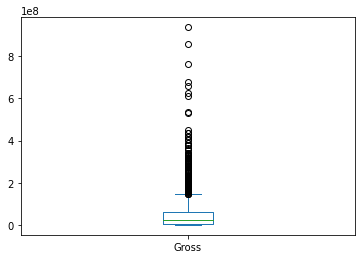

In [42]:
df['Gross'].plot(kind='box')

In [43]:
outliers_lower= df[df['Gross'] < lower_bound]['Gross'].count()
outliers_lower

0

In [44]:
outliers_upper= df[df['Gross'] > upper_bound]['Gross'].count()
outliers_upper

89

**We have filled the null values by `Median()` now we will remove the outliers.**

In [45]:
df2 = df[(df['Gross'] > lower_bound) & (df['Gross'] < upper_bound)]


In [46]:
df2.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,28341469.0
1,The Godfather,1972,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,134966411.0
3,The Godfather: Part II,1974,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,57300000.0
4,12 Angry Men,1957,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,4360000.0
6,Pulp Fiction,1994,"Crime, Drama",8.9,94.0,Quentin Tarantino,John Travolta,Uma Thurman,1826188,107928762.0


In [47]:
df2['Gross'].isnull().sum()

0

In [48]:
df2['Gross'].info()

<class 'pandas.core.series.Series'>
Int64Index: 910 entries, 0 to 999
Series name: Gross
Non-Null Count  Dtype  
--------------  -----  
910 non-null    float64
dtypes: float64(1)
memory usage: 14.2 KB


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   910 non-null    object 
 1   Released_Year  910 non-null    object 
 2   Genre          910 non-null    object 
 3   IMDB_Rating    910 non-null    float64
 4   Meta_score     753 non-null    float64
 5   Director       910 non-null    object 
 6   Star1          910 non-null    object 
 7   Star2          910 non-null    object 
 8   No_of_Votes    910 non-null    int64  
 9   Gross          910 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [50]:
df.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,28341469.0
1,The Godfather,1972,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,134966411.0
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,2303232,534858444.0
3,The Godfather: Part II,1974,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,57300000.0
4,12 Angry Men,1957,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,4360000.0


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   910 non-null    object 
 1   Released_Year  910 non-null    object 
 2   Genre          910 non-null    object 
 3   IMDB_Rating    910 non-null    float64
 4   Meta_score     753 non-null    float64
 5   Director       910 non-null    object 
 6   Star1          910 non-null    object 
 7   Star2          910 non-null    object 
 8   No_of_Votes    910 non-null    int64  
 9   Gross          910 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [52]:
df2['Meta_score'].isnull().sum()

157

<AxesSubplot:>

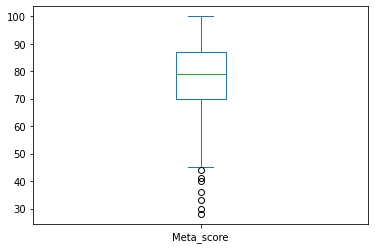

In [53]:
df2['Meta_score'].plot(kind= 'box')

In [54]:
df2['Meta_score'] = df2['Meta_score'].fillna(df2['Meta_score'].median())

C:\Users\hp\AppData\Local\Temp\ipykernel_9980\1922727526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Meta_score'] = df2['Meta_score'].fillna(df2['Meta_score'].median())


In [55]:
df2['Meta_score'].isnull().sum()

0

**There is no missing value in the `Meta_score` column.**

In [56]:
df2.isnull().sum()

Series_Title     0
Released_Year    0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
No_of_Votes      0
Gross            0
dtype: int64

**Now there is no missing value in this dataframe.**

In [57]:
df2.drop(["Series_Title"], axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9980\2590079371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["Series_Title"], axis=1, inplace=True)


In [58]:
df2.drop(["Released_Year"], axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9980\2030627397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["Released_Year"], axis=1, inplace=True)


In [59]:
df2.duplicated().sum()

0

## Groupwise analysis

### `Genre` Column

In [60]:
genre_df = df2.groupby('Genre')['Genre'].count().sort_values(ascending=False)

In [61]:
genre_df.info()

<class 'pandas.core.series.Series'>
Index: 196 entries, Drama to Action, Adventure
Series name: Genre
Non-Null Count  Dtype
--------------  -----
196 non-null    int64
dtypes: int64(1)
memory usage: 3.1+ KB


In [62]:
genre_df

Genre
Drama                        85
Comedy, Drama                35
Drama, Romance               35
Comedy, Drama, Romance       31
Action, Crime, Drama         29
                             ..
Crime, Drama, History         1
Adventure, History, War       1
Comedy, Western               1
Adventure, Horror, Sci-Fi     1
Action, Adventure             1
Name: Genre, Length: 196, dtype: int64

<AxesSubplot:>

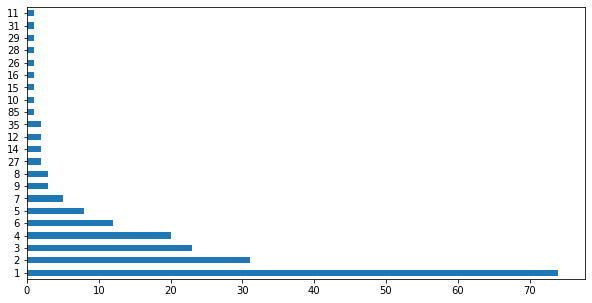

In [63]:
genre_df.value_counts().plot(kind='barh', figsize=(10,5), x='Genre', y='counts')

**`1` has the maximum value.** 

In [64]:
director_df = df2.groupby(by=['Director','Gross','Genre']).count()

In [65]:
director_df

IMDB_Rating  \
Director            Gross      Genre                                    
Aamir Khan          1223869.0  Drama, Family                        1   
Aaron Sorkin        23457439.5 Drama, History, Thriller             1   
Abdellatif Kechiche 2199675.0  Drama, Romance                       1   
Abhishek Chaubey    23457439.5 Action, Crime, Drama                 1   
Abhishek Kapoor     1122527.0  Drama, Sport                         1   
...                                                               ...   
Zaza Urushadze      144501.0   Drama, War                           1   
Zoya Akhtar         3108485.0  Comedy, Drama                        1   
                    5566534.0  Drama, Music, Romance                1   
Çagan Irmak         23457439.5 Drama, Family                        1   
Ömer Faruk Sorak    23457439.5 Adventure, Comedy, Sci-Fi            1   

                                                          Meta_score  Star1  \
Director            Gross      Genre                                          
Aamir Khan          1223869.0  Drama, Family                       1      1   
Aaron Sorkin        23457439.5 Drama, History, Thriller            1      1   
Abdellatif Kechiche 2199675.0  Drama, Romance                      1      1   
Abhishek Chaubey    23457439.5 Action, Crime, Drama                1      1   
Abhishek Kapoor     1122527.0  Drama, Sport                        1      1   
...                                                              ...    ...   
Zaza Urushadze      144501.0   Drama, War                          1      1   
Zoya Akhtar         3108485.0  Comedy, Drama                       1      1   
                    5566534.0  Drama, Music, Romance               1      1   
Çagan Irmak         23457439.5 Drama, Family                       1      1   
Ömer Faruk Sorak    23457439.5 Adventure, Comedy, Sci-Fi           1      1   

                                                          Star2  No_of_Votes  
Director            Gross      Genre                                          
Aamir Khan          1223869.0  Drama, Family                  1            1  
Aaron Sorkin        23457439.5 Drama, History, Thriller       1            1  
Abdellatif Kechiche 2199675.0  Drama, Romance                 1            1  
Abhishek Chaubey    23457439.5 Action, Crime, Drama           1            1  
Abhishek Kapoor     1122527.0  Drama, Sport                   1            1  
...                                                         ...          ...  
Zaza Urushadze      144501.0   Drama, War                     1            1  
Zoya Akhtar         3108485.0  Comedy, Drama                  1            1  
                    5566534.0  Drama, Music, Romance          1            1  
Çagan Irmak         23457439.5 Drama, Family                  1            1  
Ömer Faruk Sorak    23457439.5 Adventure, Comedy, Sci-Fi      1            1  

[908 rows x 5 columns]

## Bivariate analysis

<AxesSubplot:>

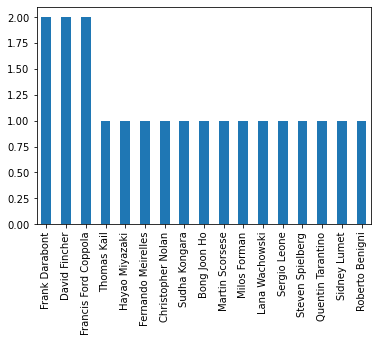

In [66]:
df2['Director'].head(20).value_counts().plot.bar()

**`Frank Darabont`, `David Fincher`, and `Francis Ford Coppola` has the maximum and equal frequency. the means movies of these Directors are most watched according to this data.**

In [67]:
df2.head()

,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,No_of_Votes,Gross
0,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,28341469.0
1,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,134966411.0
3,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,57300000.0
4,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,4360000.0
6,"Crime, Drama",8.9,94.0,Quentin Tarantino,John Travolta,Uma Thurman,1826188,107928762.0


## Scatter plot for distribution of data

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Gross'>

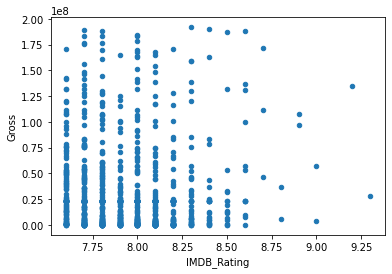

In [68]:
df2.plot.scatter(x='IMDB_Rating', y='Gross')

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genre        910 non-null    object 
 1   IMDB_Rating  910 non-null    float64
 2   Meta_score   910 non-null    float64
 3   Director     910 non-null    object 
 4   Star1        910 non-null    object 
 5   Star2        910 non-null    object 
 6   No_of_Votes  910 non-null    int64  
 7   Gross        910 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 64.0+ KB


<AxesSubplot:xlabel='IMDB_Rating', ylabel='Gross'>

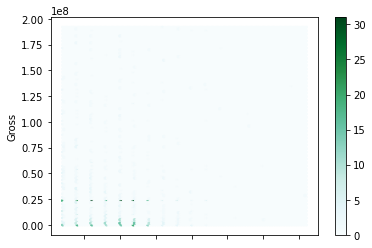

In [70]:
df2.plot.hexbin(x='IMDB_Rating', y='Gross')

In [71]:
df_genre_gross = df2.groupby(['Genre','Gross'])['Gross'].sum().sort_values()
df_genre_gross

Genre                         Gross      
Comedy, Crime, Drama          1305.0              1305.0
Action, Crime, Comedy         3296.0              3296.0
Drama, Fantasy, Romance       3600.0              3600.0
Crime, Drama, Thriller        6013.0              6013.0
Action, Crime, Drama          6460.0              6460.0
                                                ...     
Action, Drama, History        188373161.0    188373161.0
Animation, Adventure, Comedy  189422889.0    189422889.0
Animation, Action, Adventure  190241310.0    190241310.0
Animation, Adventure, Comedy  191796233.0    191796233.0
Drama                         23457439.5     234574395.0
Name: Gross, Length: 832, dtype: float64

In [72]:
df_rating_gross = df2.groupby(['IMDB_Rating','Gross'])[ 'Gross'].sum().sort_values(ascending=False)

In [73]:
df_rating_gross

IMDB_Rating  Gross     
7.8          23457439.5    680265745.5
8.1          23457439.5    656808306.0
8.0          23457439.5    656808306.0
7.7          23457439.5    492606229.5
7.9          23457439.5    398776471.5
                              ...     
7.8          6460.0             6460.0
7.6          6013.0             6013.0
7.8          3600.0             3600.0
8.0          3296.0             3296.0
7.8          1305.0             1305.0
Name: Gross, Length: 750, dtype: float64

# *Analysis and Insights*

01) **Genres with maximum number of movies in this dataset**
    
      Genre                       No. of Movies
    
        Drama                        85
        Comedy, Drama                35
        Drama, Romance               35
        Comedy, Drama, Romance       31
        Action, Crime, Drama         29

02) **Combination of a Genre in  a movie that has very less Gross that means, movies with these combination of Genre are not liked by  people and get  FLOPPED in box office**


          Genre                   Gross  
    Comedy, Crime, Drama          1305.0
    Action, Crime, Comedy         3296.0
    Drama, Fantasy, Romance       3600.0 
    Crime, Drama, Thriller        6013.0
    Action, Crime, Drama          6460.0

03) **Movies with these combination of Genre are most liked by  audience and has ruled the box office with highest Gross income.**

      Combination of Genre          Gross
    Action, Drama, History        188373161.0  
    Animation, Adventure, Comedy  189422889.0    
    Animation, Action, Adventure  190241310.0    
    Animation, Adventure, Comedy  191796233.0    
    Drama                         23457439.5 

04) **Rating of a movie has not affected it's performance in box office**

*These are top 5 examples where movie has less rating in comarision with other movies but still has maximum revenue in theatres*
        
        IMDB_Rating       Movies' Gross in  theater     
            7.8                680265745.5
            8.1                656808306.0
            8.0                656808306.0
            7.7                492606229.5
            7.9                398776471.5

*and these are examples of movies that have more or higher ratings but stil get  FLOPPED in box office*

        IMDB_Rating       Movies' Gross in  theater 
        7.8                      6460.0
        7.6                      6013.0
        7.8                      3600.0
        8.0                      3296.0
        7.8                      1305.0

## Conclusion
1. **Movies with Crime genre are poor in performance in comparision to Drama genre**
2. **Rating of a movie is not affecting it's performance in theatre**
2. **Audience likes Drama movies over Crime**